<a href="https://colab.research.google.com/github/gituserhjlee/dataexercise/blob/master/YoutubeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


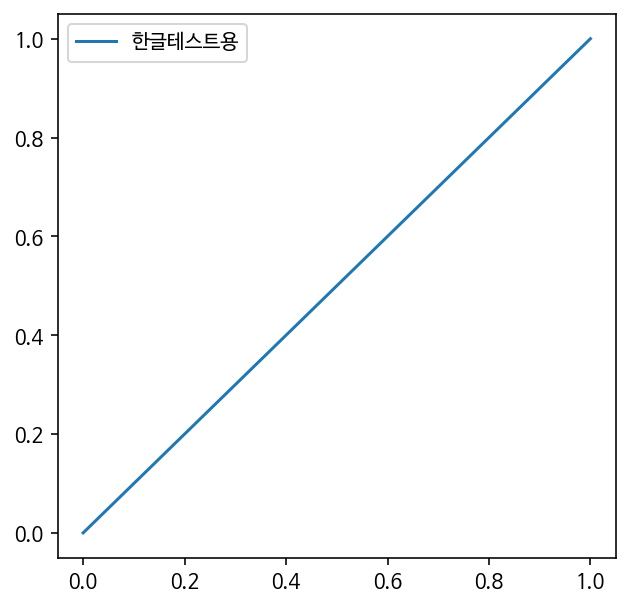

In [2]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import seaborn as sns

In [7]:
KRvideo=pd.read_csv("KRvideos.csv", engine='python', error_bad_lines='false')

In [8]:
KRvideo.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


In [9]:
KRvideo.shape

(34567, 16)

In [10]:
KRvideo.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               3163
dtype: int64

In [11]:
df=KRvideo[['title','channel_title','views']]

In [12]:
df

,title,channel_title,views
0,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,156130
1,JSA 귀순 북한군 총격 부상,Edward,76533
2,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,421409
3,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,222850
4,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,84466
...,...,...,...
34562,장모님 가게한다고 1억만 달라는 아내 사이다카톡,이슈트래커,156439
34563,여러분~ 렌즈가 이렇게 위험합니다!!!ㅜㅜ _[이슈텔러],이슈텔러 issueTeller,130948
34564,2018년 6월 13일 아침 뉴스,News Express,62555
34565,워너원 웃음 참기 영상 워너원 GO X-con.ver,원플,63306


In [13]:
df_sorted=df.sort_values(by='views', ascending=False)

In [14]:
df_sorted_max=df_sorted.drop_duplicates(['title', 'channel_title'], keep='first')

In [15]:
df_sorted_max

,title,channel_title,views
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217
4018,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,87450245
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,87430865
28554,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,73432600
26391,VENOM - Official Trailer (HD),Sony Pictures Entertainment,49185287
...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),jungbub2013,3509
4806,다니엘 생일 축하해!,여름감기 from OSW,3268
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,jungbub2013,3124
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,시때메라 _,2623


In [16]:
df_channel_view_sum=df_sorted_max.groupby(df_sorted_max['channel_title']).sum()

In [17]:
df_channel_view=df_channel_view_sum.sort_values(by='views', ascending=False)

In [18]:
df_channel_view_top=df_channel_view[:100]

In [19]:
df_channel_view_top=df_channel_view_top.reset_index()

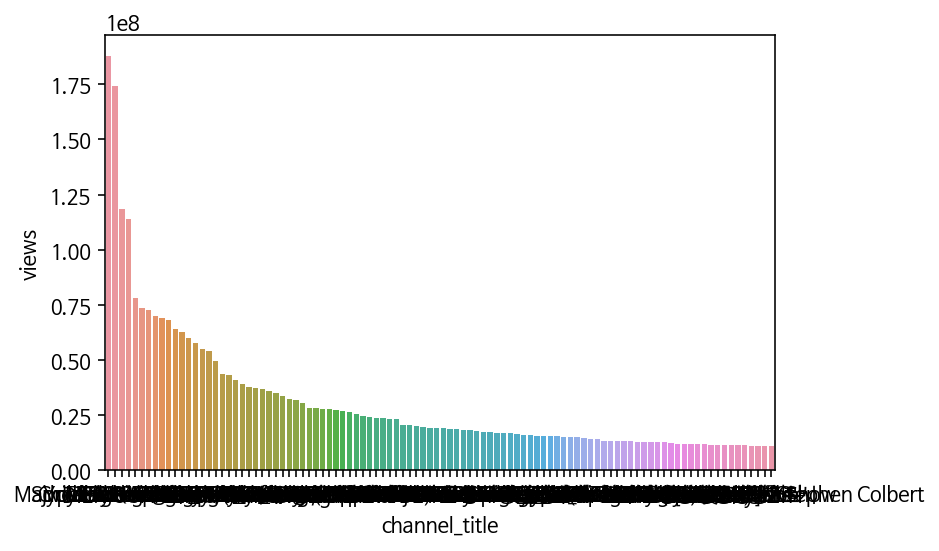

In [20]:
sns.barplot(x='channel_title', y='views', data=df_channel_view_top)

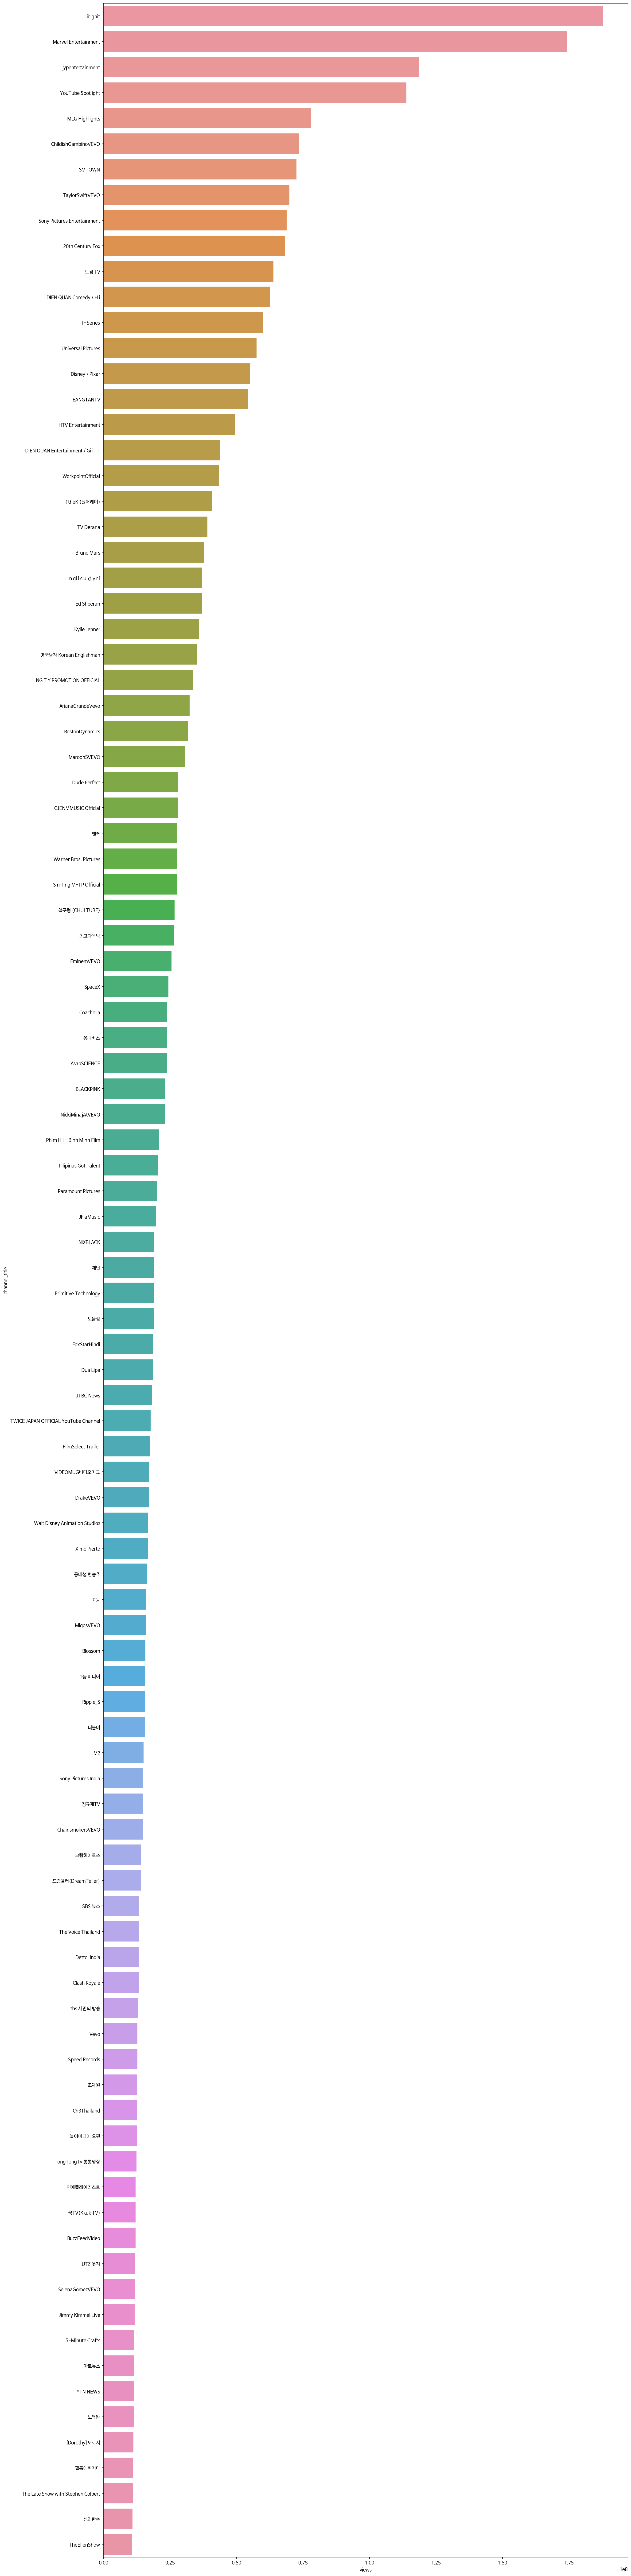

In [21]:
plt.figure(figsize=(20,100))
sns.barplot(x='views', y='channel_title', data=df_channel_view_top)

In [22]:
KRvideo

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,pj6YBBrO1sQ,18.14.06,장모님 가게한다고 1억만 달라는 아내 사이다카톡,이슈트래커,24,2018-06-10T23:00:01.000Z,[none],156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False,- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...
34563,_Ne9ER-jr20,18.14.06,여러분~ 렌즈가 이렇게 위험합니다!!!ㅜㅜ _[이슈텔러],이슈텔러 issueTeller,24,2018-06-12T07:00:06.000Z,[none],130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False,"안녕하세요~! 이슈텔러 입니다~^^화, 목 오후 4시 / 토요일 오전 9시 재밌고 ..."
34564,xuOQq_fzEjk,18.14.06,2018년 6월 13일 아침 뉴스,News Express,25,2018-06-12T13:17:29.000Z,"한국|""북한""|""미국""|""중국""|""일본""|""러시아""|""한국뉴스""|""뉴스""|""국제뉴스...",62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False,2018년 6월 13일 아침 뉴스등록되지 않은 구독자가 여기에서 내 새 채널을 지원...
34565,uXvjxeg08eQ,18.14.06,워너원 웃음 참기 영상 워너원 GO X-con.ver,원플,22,2018-06-11T11:57:20.000Z,"워너원|""워너원 고""|""워너원 GO""|""웃음참기""|""워너원 웃음참기""|""워너원 레전...",63306,2369,27,571,https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg,False,False,False,워너원 웃음 참기 영상 항상 좋아해주셔서 감사합니다8ㅅ8이번에는 얼마전에 있었던 원...


In [23]:
df=KRvideo[['title','views']]
df_sorted=df.sort_values(by='views', ascending=False).drop_duplicates(['title'],keep='first')
df_sorted=df_sorted.reset_index()
df_sorted



,index,title,views
0,4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217
1,4018,Marvel Studios' Avengers: Infinity War Officia...,87450245
2,30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865
3,28554,Childish Gambino - This Is America (Official V...,73432600
4,26391,VENOM - Official Trailer (HD),49185287
...,...,...,...
16348,13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509
16349,4806,다니엘 생일 축하해!,3268
16350,18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124
16351,509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623


In [24]:
df_sorted['title'].values

array(['YouTube Rewind: The Shape of 2017 | #YouTubeRewind',
       "Marvel Studios' Avengers: Infinity War Official Trailer",
       "BTS (방탄소년단) 'FAKE LOVE' Official MV", ...,
       '[홍익인간 인성교육] 7128강 산에 들어가고 싶다',
       '만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그', '소셜 잠금화면 앱 (달고나)'],
      dtype=object)

In [25]:
import re 
df_sorted['title_refiend']=df_sorted['title'].apply(lambda x:re.sub('[^가-힣\s]', '', x))
df_sorted

,index,title,views,title_refiend
0,4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217,
1,4018,Marvel Studios' Avengers: Infinity War Officia...,87450245,
2,30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단
3,28554,Childish Gambino - This Is America (Official V...,73432600,
4,26391,VENOM - Official Trailer (HD),49185287,
...,...,...,...,...
16348,13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509,홍익인간 인성교육 강 해외여행 증가
16349,4806,다니엘 생일 축하해!,3268,다니엘 생일 축하해
16350,18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124,홍익인간 인성교육 강 산에 들어가고 싶다
16351,509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623,만취 브이로그서프라이즈 생일 파티실시간 현실 술판여자셋 일상일상브이로그


In [26]:
df_sorted=df_sorted[df_sorted['title_refiend'].apply(lambda x:re.sub('[^가-힣]', '', x))!='']
df_sorted

,index,title,views,title_refiend
2,30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단
13,2788,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,30583293,방탄소년단
22,28605,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,22612931,방탄소년단
25,13442,Red Velvet 레드벨벳 'Bad Boy' MV,19392316,레드벨벳
52,17879,j-hope 'Daydream (백일몽)' MV,10695328,백일몽
...,...,...,...,...
16348,13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509,홍익인간 인성교육 강 해외여행 증가
16349,4806,다니엘 생일 축하해!,3268,다니엘 생일 축하해
16350,18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124,홍익인간 인성교육 강 산에 들어가고 싶다
16351,509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623,만취 브이로그서프라이즈 생일 파티실시간 현실 술판여자셋 일상일상브이로그


In [27]:
pip install soynlp

     |████████████████████████████████| 419kB 2.8MB/s 


In [28]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=100,
    min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
)
word_extractor.train(df_sorted['title_refiend'].values) # list of str or like
words = word_extractor.extract()

training was done. used memory 0.608 Gb
all cohesion probabilities was computed. # words = 211
all branching entropies was computed # words = 15680
all accessor variety was computed # words = 15680


In [29]:
words

{'가': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=4.08214131114268, right_branching_entropy=5.186178718181958, left_accessor_variety=126, right_accessor_variety=262, leftside_frequency=886, rightside_frequency=1857),
 '간': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=2.9682751087496895, right_branching_entropy=4.080972133848073, left_accessor_variety=24, right_accessor_variety=73, leftside_frequency=122, rightside_frequency=306),
 '감': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=3.534412616496005, right_branching_entropy=3.0173577464288663, left_accessor_variety=44, right_accessor_variety=21, leftside_frequency=252, rightside_frequency=108),
 '강': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=4.431318376519473, right_branching_entropy=1.2108813744476634, left_accessor_variety=118, right_accessor_variety=15, leftside_frequency=582, rightside_frequency=0),
 '강다': Scores(cohesion_forwa

In [30]:
from soynlp.tokenizer import LTokenizer
from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

In [31]:
tokenizer

In [32]:
df_sorted['tokenized']=df_sorted['title_refiend'].apply(lambda x:tokenizer.tokenize(x, remove_r=True))
df_sorted

,index,title,views,title_refiend,tokenized
2,30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단,[방탄소년단]
13,2788,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,30583293,방탄소년단,[방탄소년단]
22,28605,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,22612931,방탄소년단,[방탄소년단]
25,13442,Red Velvet 레드벨벳 'Bad Boy' MV,19392316,레드벨벳,[레드]
52,17879,j-hope 'Daydream (백일몽)' MV,10695328,백일몽,[백일몽]
...,...,...,...,...,...
16348,13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509,홍익인간 인성교육 강 해외여행 증가,"[홍익인간, 인성교육, 강, 해외여행, 증가]"
16349,4806,다니엘 생일 축하해!,3268,다니엘 생일 축하해,"[다니엘, 생일, 축하해]"
16350,18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124,홍익인간 인성교육 강 산에 들어가고 싶다,"[홍익인간, 인성교육, 강, 산에, 들어가고, 싶다]"
16351,509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623,만취 브이로그서프라이즈 생일 파티실시간 현실 술판여자셋 일상일상브이로그,"[만취, 브이로그서프라이즈, 생일, 파티실시간, 현실, 술판여자셋, 일상일상브이로그]"


In [33]:
df_top=df_sorted[df_sorted['views']>500000]

In [34]:
df_top

,index,title,views,title_refiend,tokenized
2,30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단,[방탄소년단]
13,2788,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,30583293,방탄소년단,[방탄소년단]
22,28605,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,22612931,방탄소년단,[방탄소년단]
25,13442,Red Velvet 레드벨벳 'Bad Boy' MV,19392316,레드벨벳,[레드]
52,17879,j-hope 'Daydream (백일몽)' MV,10695328,백일몽,[백일몽]
...,...,...,...,...,...
1961,32727,"중딩 커플의 키스, 친구들한텐 비밀인 이유 [진짜사랑 리턴즈2 11-1]",502090,중딩 커플의 키스 친구들한텐 비밀인 이유 진짜사랑 리턴즈,"[중딩, 커플의, 키스, 친구, 비밀, 이유, 진짜, 리턴즈]"
1962,3876,"문 대통령, JSA 장병 초청... '명예 소령' 이국종 교수도 참석/비디오머그",501508,문 대통령 장병 초청 명예 소령 이국종 교수도 참석비디오머그,"[문, 대통령, 장병, 초청, 명예, 소령, 이국종, 교수도, 참석비디오머그]"
1963,11219,윤식당2 방문한 우크라이나 블로거가 공개하는 비하인드 및 인터뷰,501469,윤식당 방문한 우크라이나 블로거가 공개하는 비하인드 및 인터뷰,"[윤식당, 방문한, 우크라이나, 블로거가, 공개, 비하인드, 및, 인터뷰]"
1965,20576,"♥좋아싫어해♥(スキキライ) 태쁘 & 엔찬 커플송! (커버송, Cover) [Pre...",500972,좋아싫어해 태쁘 엔찬 커플송 커버송 쁘띠허브,"[좋아싫어해, 태쁘, 엔찬, 커플송, 커버송, 쁘띠허브]"


In [35]:
words=[]
for i in df_top['tokenized'].values:
  for k in i:
    words.append(k)

words    

['방탄소년단',
 '방탄소년단',
 '방탄소년단',
 '레드',
 '백일몽',
 '방탄소년단',
 '방탄소년단',
 '여자',
 '밤',
 '방탄소년단',
 '레드',
 '피카부',
 '방탄소년단',
 '방탄소년단',
 '워너원',
 '약속해요',
 '선미',
 '주인공',
 '워너원',
 '부메랑',
 '엑소',
 '종현',
 '빈소',
 '방탄소년단',
 '등',
 '애도',
 '이어져',
 '샤이니',
 '종현',
 '빛이',
 '나',
 '워너원',
 '켜줘',
 '종현',
 '발인',
 '음악에',
 '열정',
 '넘쳤던',
 '가수',
 '영면동료들',
 '마지막',
 '길',
 '눈물',
 '배웅',
 '샤이니',
 '빙글뱅글',
 '워너원',
 '사랑',
 '했다',
 '샤이니',
 '데리러',
 '가',
 '텔레콤',
 '연아와',
 '성빈이의',
 '이야기',
 '현아',
 '방예담',
 '프리',
 '배틀',
 '시간',
 '능력을',
 '가진',
 '남자',
 '여성에게',
 '한',
 '행동',
 '방탄소년단',
 '샤이니',
 '종현',
 '빈소',
 '찾은',
 '소녀시대',
 '써니',
 '멈추지',
 '않는',
 '눈물',
 '동영상',
 '단독',
 '조현민',
 '에이',
 '폭언',
 '음성파일',
 '공개',
 '방탄소년단',
 '방탄',
 '꽃',
 '길',
 '직캠',
 '트와이스',
 '직캠',
 '김정은',
 '웃게',
 '한',
 '제주소년',
 '오연준의',
 '바람이',
 '불어오는',
 '곳비디오머그',
 '내',
 '여자',
 '개',
 '쩌는듯',
 '엔시티',
 '드림',
 '아내를',
 '낯선사람',
 '차에',
 '태우면',
 '안되는',
 '이유',
 '레드',
 '피카부',
 '방탄소년단',
 '여자',
 '시청자들',
 '빵터지게한',
 '선수',
 '대화',
 '이엑스아이디',
 '내일해',
 '뮤직',
 '비디오',
 '가요대축제',
 '방탄소년단',
 '병맛더빙',
 '급식생',
 '콜롬

In [36]:
from collections import Counter
count=Counter(words)
words_dict=dict(count)
words_dict

{'방탄소년단': 50,
 '레드': 19,
 '백일몽': 1,
 '여자': 48,
 '밤': 4,
 '피카부': 5,
 '워너원': 10,
 '약속해요': 2,
 '선미': 3,
 '주인공': 2,
 '부메랑': 1,
 '엑소': 2,
 '종현': 27,
 '빈소': 10,
 '등': 5,
 '애도': 1,
 '이어져': 1,
 '샤이니': 22,
 '빛이': 1,
 '나': 2,
 '켜줘': 1,
 '발인': 5,
 '음악에': 1,
 '열정': 1,
 '넘쳤던': 1,
 '가수': 2,
 '영면동료들': 1,
 '마지막': 8,
 '길': 3,
 '눈물': 21,
 '배웅': 3,
 '빙글뱅글': 2,
 '사랑': 10,
 '했다': 7,
 '데리러': 3,
 '가': 3,
 '텔레콤': 1,
 '연아와': 1,
 '성빈이의': 1,
 '이야기': 13,
 '현아': 1,
 '방예담': 2,
 '프리': 1,
 '배틀': 7,
 '시간': 11,
 '능력을': 1,
 '가진': 2,
 '남자': 23,
 '여성에게': 1,
 '한': 17,
 '행동': 3,
 '찾은': 2,
 '소녀시대': 5,
 '써니': 1,
 '멈추지': 1,
 '않는': 2,
 '동영상': 3,
 '단독': 1,
 '조현민': 2,
 '에이': 1,
 '폭언': 1,
 '음성파일': 2,
 '공개': 15,
 '방탄': 4,
 '꽃': 4,
 '직캠': 21,
 '트와이스': 10,
 '김정은': 15,
 '웃게': 1,
 '제주소년': 1,
 '오연준의': 1,
 '바람이': 3,
 '불어오는': 3,
 '곳비디오머그': 1,
 '내': 7,
 '개': 7,
 '쩌는듯': 1,
 '엔시티': 3,
 '드림': 1,
 '아내를': 2,
 '낯선사람': 1,
 '차에': 1,
 '태우면': 1,
 '안되는': 9,
 '이유': 51,
 '시청자들': 2,
 '빵터지게한': 1,
 '선수': 24,
 '대화': 1,
 '이엑스아이디': 1,
 '내일해': 1,
 '뮤직': 2,
 '

In [48]:
from wordcloud import WordCloud
wordcloud=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', width=500, height=500, background_color='white').generate_from_frequencies(words_dict)

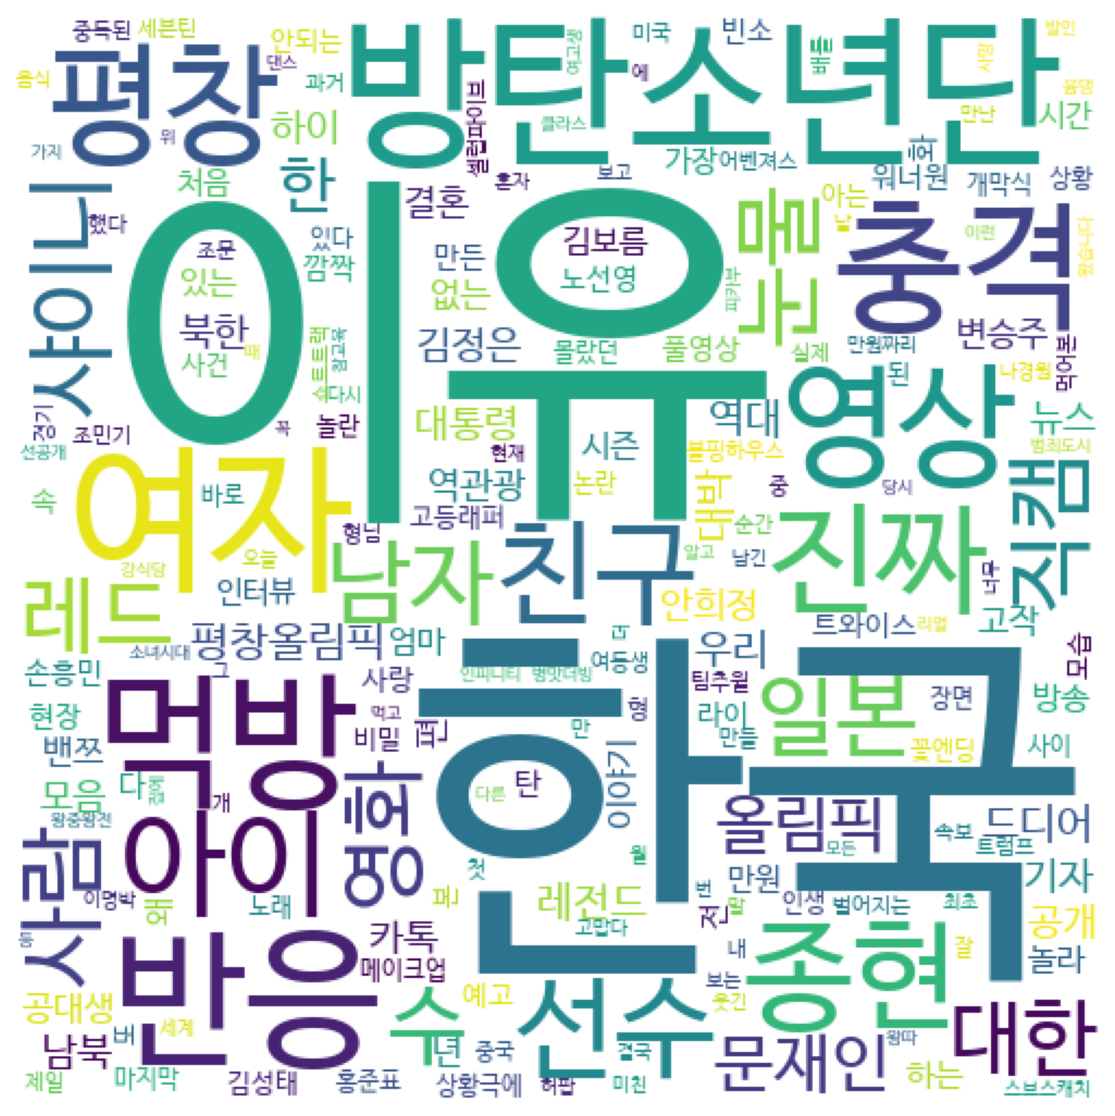

In [49]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
